In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import utc  #pytz es una biblioteca para trabajar con fechas y horas en Python y utc es la zona horaria universal
data = pd.read_csv("reviews.csv", parse_dates= ["Timestamp"])  #Parse_dates es para que pandas reconozca la fecha en la columna
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


Rating average/count by day

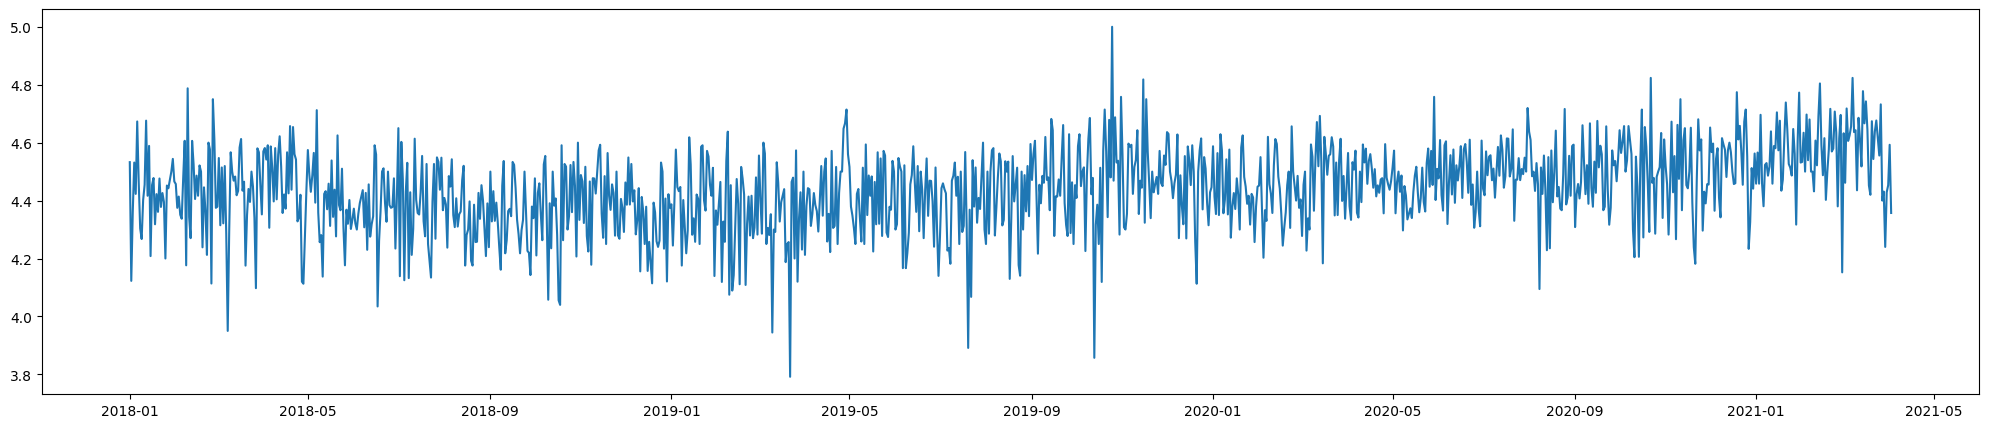

In [4]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data["Day"] = data["Timestamp"].dt.date  #Crea una nueva columna "Day" que contenga solo la fecha
day_average = data.groupby("Day").mean(numeric_only=True)  #Agrupa por la columna "Day" y calcula la media solo de las columnas numéricas
plt.figure(figsize= (25,5))  #Aqui lo que hacemos es darle un tamaño a la figura 25 es para el ancho y 3 para el alto
plt.plot(day_average.index, day_average["Rating"])

Rating average by week

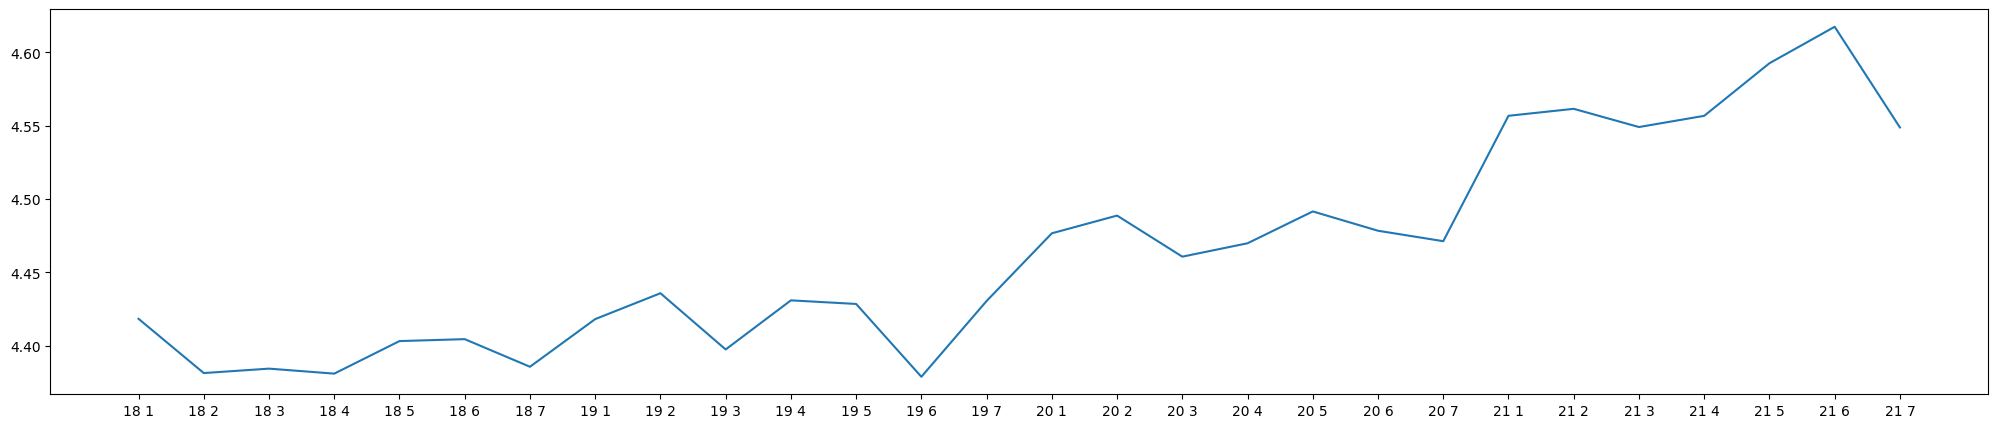

In [5]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data["Week"] = data["Timestamp"].dt.strftime("%y %u")  #Aqui lo que hacemos es darle formato a la fecha para que nos muestre el año y las semanas
week_average = data.groupby(["Week"]).mean(numeric_only=True)
week_average["Rating"] #Aqui imprimimos el promedio de cada semana

plt.figure(figsize= (25,5))
plt.plot(week_average.index, week_average["Rating"])

Average rating by month

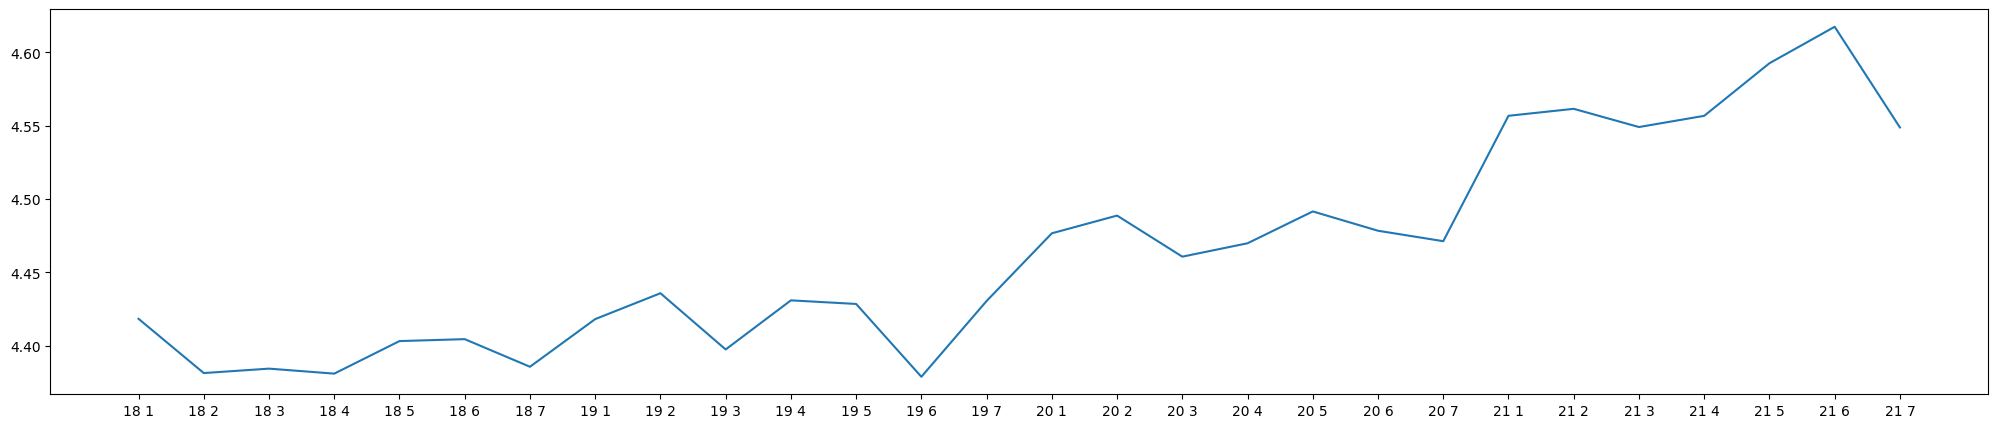

In [6]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data["Month"] = data["Timestamp"].dt.strftime("%y %u")  #Aqui lo que hacemos es darle formato a la fecha para que nos muestre el año y las semanas
month_average = data.groupby(["Month"]).mean(numeric_only=True)

plt.figure(figsize= (25,5))
plt.plot(month_average.index, month_average["Rating"])

In [7]:
month_average.head()

,Rating
Month,
18 1,4.418391
18 2,4.381423
18 3,4.384436
18 4,4.381032
18 5,4.403217


Average rating by moth by courde

<Axes: xlabel='Month'>

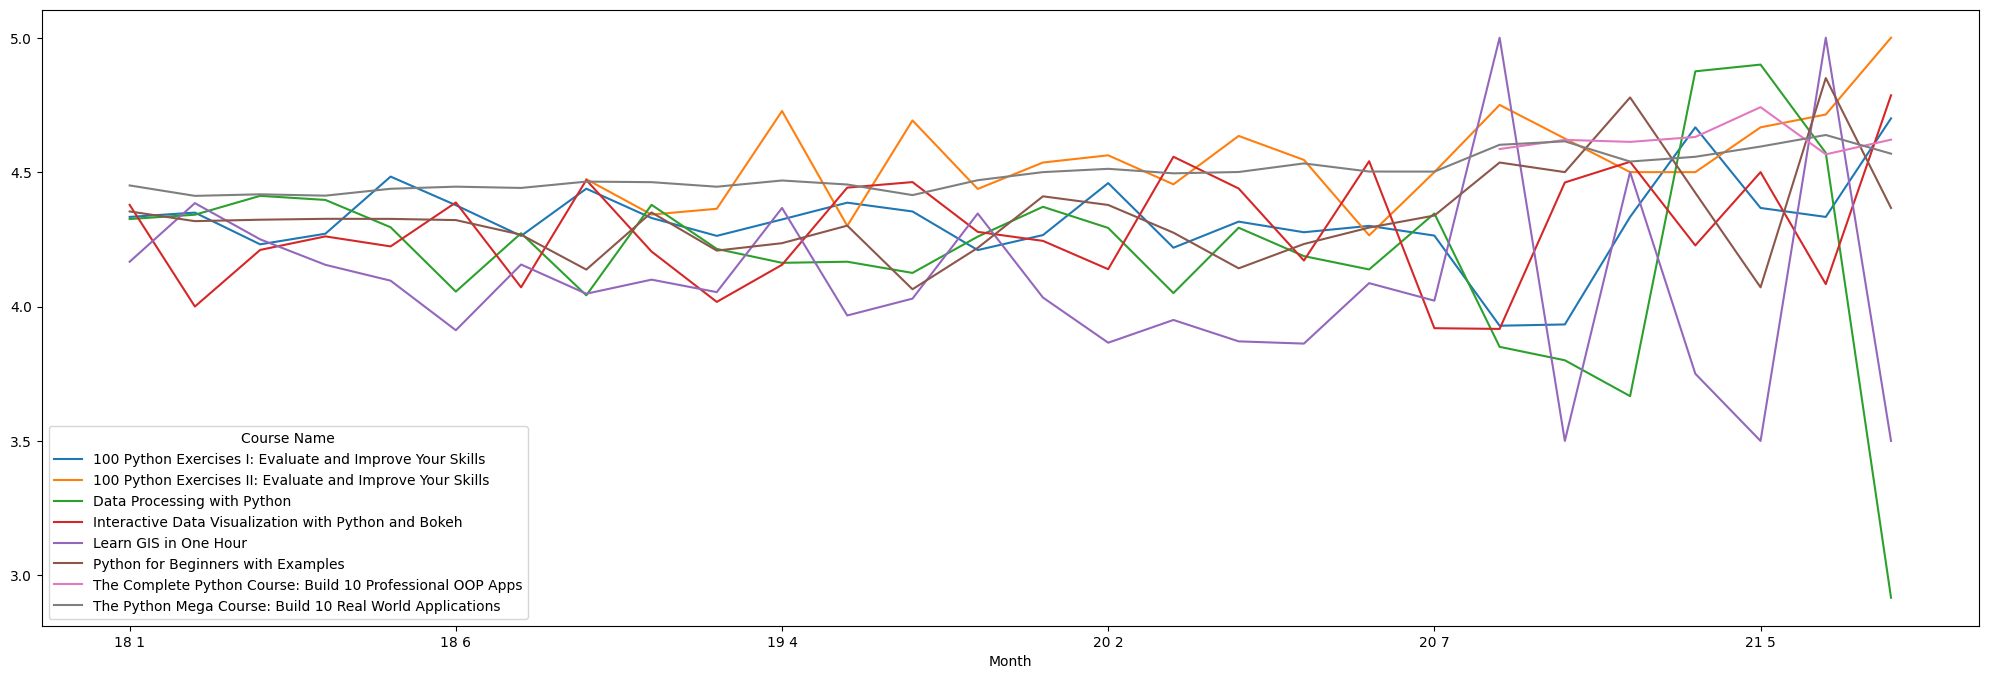

In [8]:
data["Month"] = data["Timestamp"].dt.strftime("%y %u")
month_average_crs = data.groupby(["Month", "Course Name"])["Rating"]. mean(numeric_only=True).unstack()  #unstack se usa para transformar una columna en filas

month_average_crs.plot(figsize= (25, 8))

What day are people the happiest?

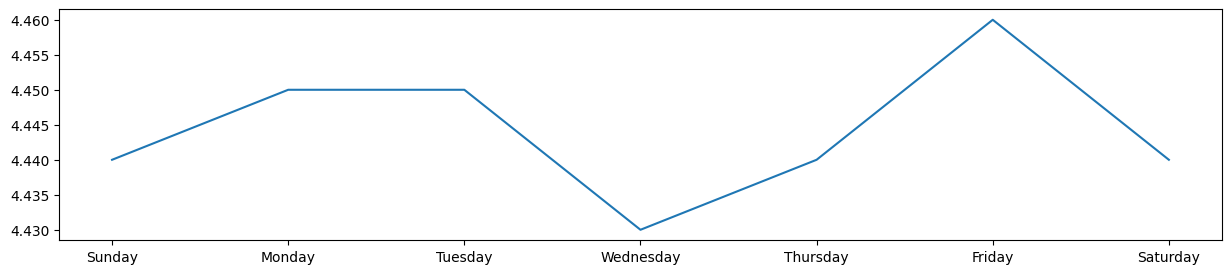

In [9]:
data["Week_day"] = data["Timestamp"].dt.strftime("%A")
data["Week_day_number"] = data["Timestamp"].dt.strftime("%w")

week_day_average = round(data.groupby(["Week_day", "Week_day_number"]).mean(numeric_only =True), 2)
week_day_average = week_day_average.sort_values("Week_day_number")

plt.figure(figsize= (15,3))
plt.plot(week_day_average.index.get_level_values(0), week_day_average["Rating"])

In [10]:
dir(plt)

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'BackendFilter',
 'Button',
 'Circle',
 'Colorizer',
 'ColorizingArtist',
 'Colormap',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_ColorizerInterface',
 '_NO_PYPLOT_NOTE',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_a

In [11]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(
    x: 'ArrayLike',
    *,
    explode: 'ArrayLike | None' = None,
    labels: 'Sequence[str] | None' = None,
    colors: 'ColorType | Sequence[ColorType] | None' = None,
    autopct: 'str | Callable[[float], str] | None' = None,
    pctdistance: 'float' = 0.6,
    shadow: 'bool' = False,
    labeldistance: 'float | None' = 1.1,
    startangle: 'float' = 0,
    radius: 'float' = 1,
    counterclock: 'bool' = True,
    wedgeprops: 'dict[str, Any] | None' = None,
    textprops: 'dict[str, Any] | None' = None,
    center: 'tuple[float, float]' = (0, 0),
    frame: 'bool' = False,
    rotatelabels: 'bool' = False,
    normalize: 'bool' = True,
    hatch: 'str | Sequence[str] | None' = None,
    data=None
) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'
    Plot a pie chart.

    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.

    The wedges are plotted 

Number of ratings by course

In [14]:
share = data.groupby(["Course Name"])["Rating"].count()
for v1, v2 in zip(share.index, share):
    print(v1, v2)

100 Python Exercises I: Evaluate and Improve Your Skills 1593
100 Python Exercises II: Evaluate and Improve Your Skills 280
Data Processing with Python 868
Interactive Data Visualization with Python and Bokeh 767
Learn GIS in One Hour 499
Python for Beginners with Examples 4821
The Complete Python Course: Build 10 Professional OOP Apps 470
The Python Mega Course: Build 10 Real World Applications 35702


([<matplotlib.patches.Wedge at 0x21a37396660>,
 [Text(1.093204501902345, 0.12208159984389857, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539490063081, 0.26357989832654555, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237467267586, 0.3482339511976009, 'Data Processing with Python'),
  Text(0.9969710233917297, 0.4648104759116852, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514243624985, 0.5509973551382421, 'Learn GIS in One Hour'),
  Text(0.6871673546107159, 0.8589534485391574, 'Python for Beginners with Examples'),
  Text(0.3307029829407597, 1.0491117848323332, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.876275637740144, -0.6649368441461971, 'The Python Mega Course: Build 10 Real World Applications')])

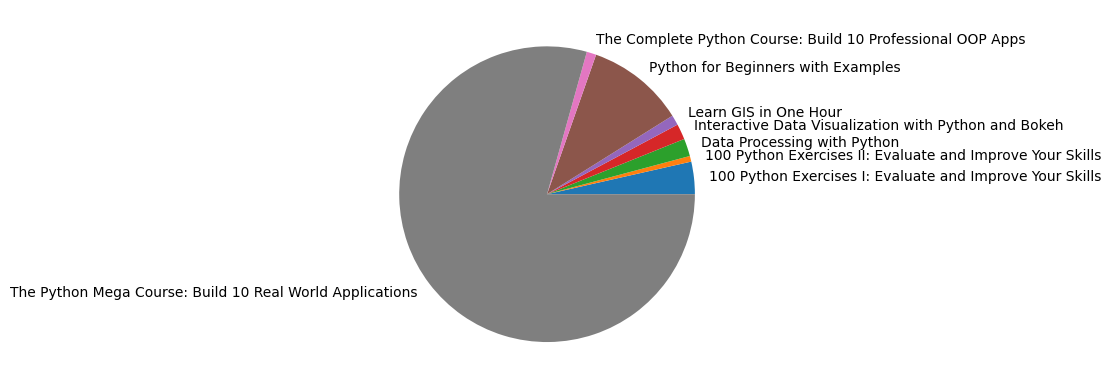

In [13]:
plt.pie(share,labels= share.index)